## Regresja logistyczna

Perceptron bazujący na modelu sztucznego neuronu jest dobrym algorytmem, aby wyrobić sobie pewną intuicję, jednak nie jest on powszechnie stosowany do rozwiązywania problemów klasyfikacji. Głównym problemem jest wykorzystywana w nim funkcja aktywacji oraz, w konsekwencji, sposób uczenia. Funkcja skokowa Heaviside'a jest nieróżniczkowalna w punkcie $x=0$, a jej pochodna wynosi $0$ w każdym innym punkcie. Powoduje to, że metody gradientowe (w tym metoda gradientu prostego) nie mogą być stosowane do optymalizacji wag. Wiele algorytmów, w tym implementowana regresja liniowa, wykorzystuje metody gradientowe do optymalizacji. Aby to było możliwe w przypadku perceptronu, należy zmienić funkcję aktywacji na taką, która będzie różniczkowalna w każdym punkcie.

### Funkcja sigmoidalna

Funkcją, która spełnia powyższe wymagania jest funkcja sigmoidalna, zwana również funkcją logistyczną. Dana jest wzorem:

$$f(x) = \frac{1}{1+e^{-x}}$$

Poniższy obraz przedstawia wykres funkcji sigmoidalnej.

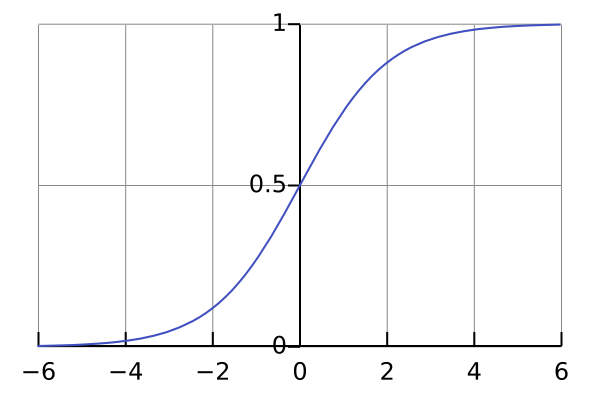

Tak jak w przypadku funkcji skokowej Heaviside'a, funkcja mapuje dowolną wartość rzeczywistą na wartości z przedziału $(0,1)$. Wartość funkcji może być rozumiana jako prawdopodobieństwo wyniku pozytywnego. Przykładowo, jeśli $f(x) = 0.9$, to prawdopodobieństwo $1$ jest równe $90\%$. Czyli jeśli mamy problem klasyfikacji binarnej, a $1$ oznacza np. obecność wirusa grypy w organiźmie, to możemy powiedzieć, że na $90\%$ jesteśmy chorzy na grypę. Warto również zauważyć, że funkcja logistyczna zmierza do $1$ dla wartości dodatnich, a dla wartości ujemnych zmierza do $0$. Zmiana predykcji jest w punkcie $0$, gdzie wartość funkcji wynosi $0.5$.

Zaletą funkcji sigmoidalnej jest łatwa do obliczenia pochodna:

$$f(x)' = f(x)(1-f(x))$$

Algorytm, który wykorzystuje tę funkcję aktywacji nazywany jest **regresją logistyczną**. Nazwa może być myląca i może sugerować, że służy on do rozwiązywania problemów regresji, ale w rzeczywistości wykorzystywany jest do problemów klasyfikacji.

Finalnie, nasza hipoteza będzie wyglądać następująco.

$$h_w(x) = f(\sum_{i=0}^{n}{w_ix_i})$$

$$s = \sum_{i=0}^{n}{w_ix_i}$$

$$f(s) = \frac{1}{1+e^{-s}}$$

### Funkcja błędu

Poznaliśmy już jedną funkcję błędu, która wykorzystywana była do obliczenia błędu regresji liniowej (i wielomianowej). W przypadku regresji logistycznej nie możemy z niej skorzystać, ponieważ regresja logistyczna spowoduje, że taka funkcja będzie miała wiele lokalnych minimum, a co za tym idzie, znalezienie optymalnego zestawu wag będzie bardzo trudne. W związku z tym, konieczne jest znalezienie innej funkcji błędu. Powszechna funkcja błędu, która jest wykorzystywana w algorytmie regresji logistycznej ma następującą formę.

$$
Cost(h_w(x), y) =
\begin{cases}
-log(h_w(x))        &   \mathrm{if} \ y=1,\\
-log(1 - h_w(x))    &   \mathrm{if} \ y=0
\end{cases}
$$

Gdzie $y$ jest prawdziwą wartością.

<table>
    <tr>
        <td> 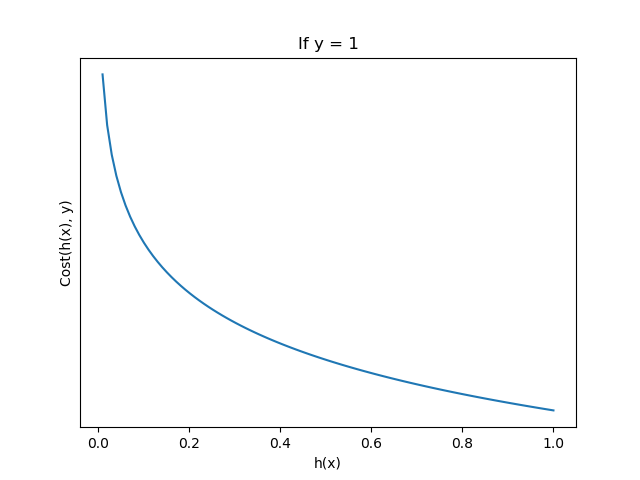 </td>
        <td> 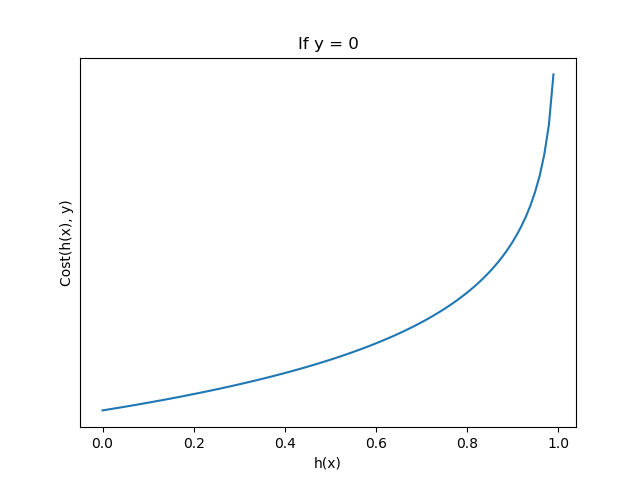 </td>
    </tr>
</table>

Czyli jeśli $y=0$, to funkcja kosztu będzie mieć wartość $0$, tylko jeśli hipoteza będzie mieć wartość $0$. Jeśli $h_w(x)$ zmierza do $1$, to funkcja kosztu zmierza do nieskończoności. 

Analogicznie, jeśli $y=1$, to funkcja kosztu będzie równa $0$ tylko, gdy hipoteza będzie równa $1$. Jeśli $h_w(x)$ będzie zmierzać do $0$, to wartość funkcji kosztu będzie zmierzać do nieskończoności.

Zapis powyższej funkcji błędu może zostać uproszczony do jednego równania:

$$Cost(h_w(x), y) = -y\:log(h_w(x)) - (1 - y)\:log(1 - h_w(x))$$

Dlaczego można tak zrobić? Zauważmy, że jeśli $y=0$, to pierwsza część równania się zeruje, zostaje jedynie druga. Natomiast jeśli $y=1$, to zeruje się druga część równania, zostawiając jedynie pierwszą.

### Trenowanie modelu

Wzór na funkcję błędu dla regresji logistycznej można zapisać jako:

$$J(w) = \frac{1}{m} \sum_{i=1}^{m}Cost(h_w(x^{(i)}),y^{(i)}) = - \frac{1}{m} [\sum_{i=1}^{m} y^{(i)} log(h_w(x^{(i)})) + (1 - y^{(i)}) log(1 - h_w(x^{(i)}))]$$

Dobór wag przeprowadzony zostanie z wykorzystaniem algorytmu gradientu prostego. Tak jak w przypadku algorytmu regresji liniowej, w każdej epoce obliczone zostaną nowe wagi, które powinny skutkować zmniejszeniem błędu. W algorytmie perceptronu wagi akutalizowane były po każdej próbce uczącej, natomiast tutaj po jednym przejściu zestawu uczącego. Istnieją różne warianty ilości próbek, po których wagi są aktualizowane, jednak dla uproszczenia wybieramy cały zbiór.

Dobra wiadomość jest taka, że proces aktualizacji wag wygląda praktycznie identycznie, jak miało to miejsce w przypadku algorytmu regresji liniowej. Pochodna funkcji błędu dla $j$-tej wagi ma postać: 

$$\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Zatem wagi akutalizujemy tak, jak robiliśmy to uprzednio:

$$w_j = w_j - \alpha \frac{\partial J(w)}{\partial w_j} = w_j - \frac{\alpha}{m} \sum^{m}_{i=1} (h_w(x^{(i)}) - y^{(i)})x_{j}^{(i)}$$

Proces aktualizacji wag wynika bezpośrednio z obliczenia pochodnej funkcji błędu względem wag. W tym notatniku nie będziemy przechodzić przez cały ten proces. Dla osób, które chcą poznać matematyczne detale, przekształcenia opisane są np. [tutaj](https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17).

_Powyższy zapis jest w formie iteracyjnej, a w notaniku z regresją liniową był w formie macierzowej. Te dwa zapisy są równoznaczne i warto znać i rozumieć obie formy._

### Regresja logistyczna a perceptron

Powyższy algorytm w formie z sigmoidalną funkcją aktywacji bardzo często wykorzystywany jest jako podstawowy element wielowarstwowych sieci neuronowych. Jego dobre zrozumienie znacznie ułatwi zrozumienie sposobu działania sieci neuronowych. Porównując ze sobą działania algorytmu regresji logistycznej, a wcześniej implementowanego perceptronu, na pojedynczych neuronach nie widać róznic. Obie implementacje służą do rozwiązywania problemów klasyfikacji w zbiorach liniowo separowalnych. Ich celem jest wyznaczenie prostej separującej próbki pochodzące z różnych klas. Różnica pojawia się w momencie, gdy chcemy stworzyć strukturę złożoną z wielu neuronów. Wykorzystanie w tym celu perceptronu nie jest możliwe, ponieważ sieci neuronowe trenowane są najcześciej z wykorzystaniem algorytmu opartego o obliczenie gradientu funkcji błędu.

Struktury złożone z wielu neuronów mogą rozwiązywać problemy nieliniowo separowalne. Daje to duże możliwości i tłumaczy duże zainteresowanie sieciami neuronowymi. Innym sposobem na rozwiązanie problemu nieliniowo separowalnego może być rozwinięcie hipotezy o wielomianową formę, tak jak robiliśmy to w przypadku regresji wielomianowej.

### Zadanie 1

Zaimplementuj opisany algorytm regresji logistycznej, który będzie skutecznie klasyfikował próbki z liniowo separowalnego zestawu danych. 

In [1]:
import unittest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-x))

def initialize_weights(n: int) -> float:
    return np.random.uniform(0, 1, n + 1)

def calculate_logistic_regression(X: np.ndarray, weights: np.ndarray) -> np.ndarray:
    return sigmoid(np.dot(X, weights))

def calculate_cost(predictions: np.ndarray, y: np.ndarray) -> float:
    EPS = 1e-14
    predictions = np.clip(predictions, EPS, 1 - EPS)
    m = len(y)
    cost = np.sum((-y) * np.log(predictions) - (1-y) * np.log(1 - predictions)) / m
    return cost


def update_weights(weights: np.ndarray, X: np.ndarray, y: np.ndarray, alpha: float) -> np.ndarray:
    predictions = calculate_logistic_regression(X, weights)
    m = len(y)
    gradient = 1/m * np.dot(X.T, (predictions - y))
    weights = weights - alpha * gradient
    return gradient


def classification(X: np.ndarray, y: np.ndarray, alpha: float) -> Tuple[list, list]:   
    epoch_number = 30
    weights = initialize_weights(len(X[0]))
    tmp = np.ones((X.shape[0], 1))
    X = np.hstack((tmp, X))
    costs = [calculate_cost(calculate_logistic_regression(X, weights), y)] 
    weights_history = [weights]
    
    for _ in range(epoch_number - 1):
        weights = update_weights(weights, X, y, alpha)
        weights_history.append(weights)
        cost = calculate_cost(calculate_logistic_regression(X, weights), y)
        costs.append(cost)

    return weights_history, costs

### Zadanie 2

Wczytaj zbiór danych znajdujący się w pliku Ankieta.csv, stwórz wykres próbek. Następnie stwórz 3 wykresy na których przedstawisz jak zmieniała się granica decyzyjna zaimplementowanego algoryt|mu regresji logistycznej na przestrzeni epok. Porównaj wynik z algorytmem perceptronu (zarówno czas działania jak i jakość wyznaczonej granicy decyzyjnej)

**Uwaga:** Przed podaniem danych na wejście klasyfikatora należy je znormalizować. Zbyt duże wartości powodują, że logarytmy liczą się niepoprawnie (log(0) daje NaN). Dla zainteresowanych wyjaśnienie dostępne jest [tutaj](https://stackoverflow.com/questions/35419882/cost-function-in-logistic-regression-gives-nan-as-a-result)

0      55
1      78
2      55
3      99
4      90
5      70
6      70
7      62
8      59
9      88
10     79
11     90
12     66
13    100
14     67
15     89
16     56
17     83
Name: Waga, dtype: int64
0    -1.384220
1     0.181537
2    -1.384220
3     1.611142
4     0.998454
5    -0.363074
6    -0.363074
7    -0.907685
8    -1.111915
9     0.862301
10    0.249614
11    0.998454
12   -0.635380
13    1.679218
14   -0.567303
15    0.930378
16   -1.316144
17    0.521919
Name: Waga, dtype: float64


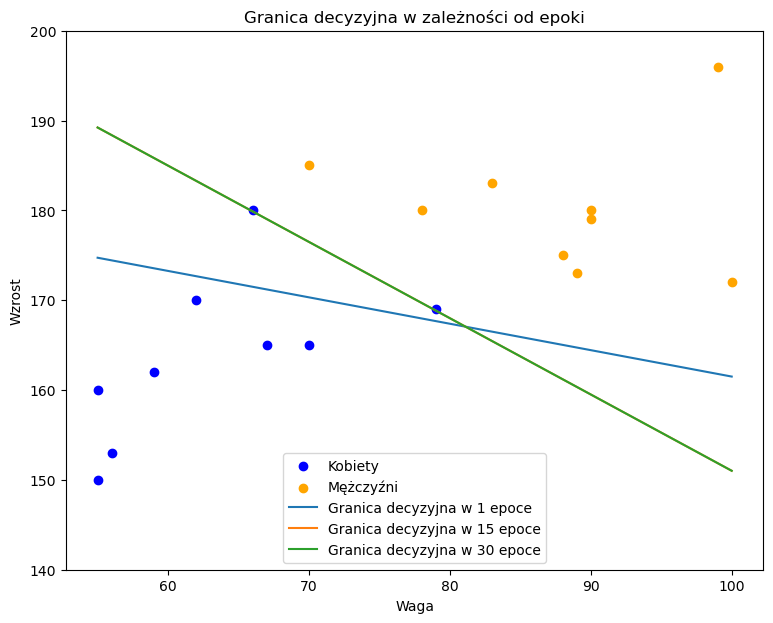

In [4]:
df = pd.read_csv('datasets/Ankieta.csv', sep=',')
df['Plec'] = df['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})
df_female = df[df['Plec'] == 1]
df_male = df[df['Plec'] == 0]

normalized_weight = (df['Waga'] - np.mean(df['Waga'])) / np.std(df['Waga'])
normalized_height = (df['Wzrost'] - np.mean(df['Wzrost'])) / np.std(df['Wzrost'])
X = pd.DataFrame({'Waga': normalized_weight, 'Wzrost': normalized_height}).values


weights_history, errors_history = classification(X, df['Plec'], 0.001)
weights = [weights_history[0], weights_history[len(weights_history)//2], weights_history[-1]]
epochs_number = [1, len(weights_history) // 2, len(weights_history)]

x1_range = np.linspace(normalized_weight.min(), normalized_weight.max(), 1000)

fig, ax = plt.subplots(figsize=(9,7))
for i in range(len(weights)):
    if i == 0:
        ax.scatter(df_female['Waga'], df_female['Wzrost'], color='blue', label='Kobiety')
        ax.scatter(df_male['Waga'], df_male['Wzrost'], color='orange', label='Mężczyźni')


    x2_range = -(weights[i][1] * x1_range + weights[i][0]) / weights[i][2]
    x1 = x1_range * np.std(df['Waga']) + np.mean(df['Waga'])
    x2 = x2_range * np.std(df['Wzrost']) + np.mean(df['Wzrost'])
    ax.plot(x1, x2, label=f'Granica decyzyjna w {epochs_number[i]} epoce')

ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('Granica decyzyjna w zależności od epoki')
ax.legend()
ax.set_ylim([140, 200]) 

plt.show()


In [18]:
df = pd.read_csv('datasets/Ankieta.csv', sep=',')
df['Plec'] = df['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})

normalized_weight = (df['Waga'] - np.mean(df['Waga'])) / np.std(df['Waga'])
normalized_height = (df['Wzrost'] - np.mean(df['Wzrost'])) / np.std(df['Wzrost'])

start_time = time.time()
weights_history = classification(pd.DataFrame({'Waga': normalized_weight, 'Wzrost': normalized_height}).values, df['Plec'], 0.001)
end_time = time.time()
logistic_regression_time = end_time - start_time


print(f"Czas działania regresji logistycznej: {logistic_regression_time} sekundy")
print(f"Czas działania dla perceptronu: 0.0049974918365478516 sekundy")


Czas działania regresji logistycznej: 0.032193660736083984 sekundy
Czas działania dla perceptronu: 0.0049974918365478516 sekundy


\# YOUR ANSWER HERE

### Zadanie 3

Wykorzystaj stworzony algorym w celu znalezienia granicy decyzyjnej będącej płaszczyzną w trójwymiarowej przestrzeni. Zbiór danych znajduje się w pliku o nazwie 3D_perceptron.csv. Stwórz wykresy analogicznie jak w zadaniu 2. Porównaj wynik z algorytmem perceptronu.

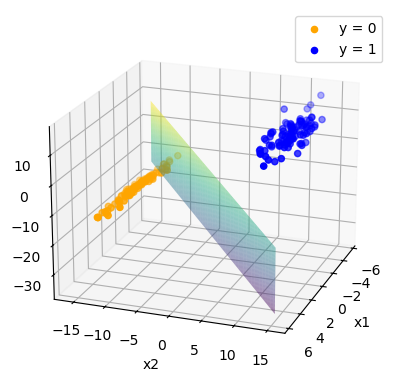

In [19]:
df = pd.read_csv('datasets/3D_perceptron.csv', sep=',')
df0 = df[df['y'] == 0]
df1= df[df['y'] == 1]

normalized_x1 = (df['x1'] - np.mean(df['x1'])) / np.std(df['x1'])
normalized_x2 = (df['x2'] - np.mean(df['x2'])) / np.std(df['x2'])
normalized_x3 = (df['x3'] - np.mean(df['x3'])) / np.std(df['x3'])

weights_history = classification(pd.DataFrame({'x1': normalized_x1, 'x2': normalized_x2, 'x3': normalized_x3}).values, df['y'], 0.01)
weights = weights_history[-1]

x1_range = np.linspace(normalized_x1.min(), normalized_x1.max(), 100)
x2_range = np.linspace(normalized_x2.min(), normalized_x2.max(), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

normalized_x3 = (- weights[0] * x1_grid - weights[1] * x2_grid - weights[3]) / weights[2]

x1 = x1_range * np.std(df['x1']) + np.mean(df['x1'])
x2 = x2_range * np.std(df['x2']) + np.mean(df['x2'])
x3 = normalized_x3 * np.std(df['x3']) + np.mean(df['x3'])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df0['x1'], df0['x2'], df0['x3'], color='orange', label='y=0')
ax.scatter(df1['x1'], df1['x2'], df1['x3'], color='blue', label='y=1')
ax.plot_surface(x1, x2, x3, cmap='viridis', alpha=0.5, label='Granica decyzyjna')
    
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(elev=20, azim=20)

plt.legend(['y = 0', 'y = 1'])
plt.show()

### Zadanie 4

Zaimplementu test jednostkowy sprawdzający czy błąd spada wraz z epokami.

In [20]:
class TestLogisticRegression(unittest.TestCase):
    def test_perform_classification(self):
        df = pd.read_csv('datasets/Ankieta.csv', sep=',')
        df['Plec'] = df['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})

        normalized_weight = (df['Waga'] - np.mean(df['Waga'])) / np.std(df['Waga'])
        normalized_height = (df['Wzrost'] - np.mean(df['Wzrost'])) / np.std(df['Wzrost'])
        X = pd.DataFrame({'Waga': normalized_weight, 'Wzrost': normalized_height}).values
        alpha = 0.001
        weights_history, costs = classification(X, df['Plec'], alpha)
        costs.sort(reverse=True)
        for i in range(len(costs) - 1):
            self.assertTrue(costs[i] >= costs[i+1])

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_perform_classification (__main__.TestLogisticRegression.test_perform_classification) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.032s

OK


### Zadanie 5

Zaproponuj i oblicz miarę skuteczności algorytmu regresji logistycznej. Wynik należy podać w % (ile próbek poprawnie zaklasyfikował algorytm) 

In [21]:
def evaluate_logistic_regression_accuracy(X_data: np.ndarray, y_labels: np.ndarray) -> float:
    accuracies = []
    for _ in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.2, random_state=None)
        weights_history, _ = classification(X_train, y_train, 0.001)
        final_weights = weights_history[-1]

        y_predicted = []
        for sample in X_test:
            sample_with_bias = np.insert(sample, 0, 1)
            prediction = calculate_logistic_regression(sample_with_bias, final_weights)
            y_predicted.append(prediction)

        y_predicted = np.round(np.array(y_predicted)).astype(int)
        accuracy = accuracy_score(y_test, y_predicted)
        accuracies.append(accuracy)

    return np.mean(accuracies)

X_data = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_labels = np.array([0, 0, 1, 1])

accuracy = evaluate_logistic_regression_accuracy(X_data, y_labels)
print(f"Logistic Regression Accuracy: {accuracy * 100}%")

Logistic Regression Accuracy: 80.0%


### Zadanie 6

Jak współczynnik uczenia alpha wypływa na wynik oraz ilość epok jakie należy zastosować? Porównaj minimum 5 różnych wartości współczynnika alpha oraz sformułuj wnioski.

In [26]:
df = pd.read_csv('datasets/Ankieta.csv', sep=',')
df['Plec'] = df['Plec'].map({'Kobieta': 1, 'Mezczyzna': 0})

normalized_weight = (df['Waga'] - np.mean(df['Waga'])) / np.std(df['Waga'])
normalized_height = (df['Wzrost'] - np.mean(df['Wzrost'])) / np.std(df['Wzrost'])

X = pd.DataFrame({'Waga': normalized_weight, 'Wzrost': normalized_height}).values

def error_check(X: np.ndarray, y: np.ndarray):
    alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
    for i in alphas:
        _, errors_history = classification(X, y, i)
        epochs_number = 0
        errors_history.sort()
        final_error = errors_history[-1]
        for j in errors_history:
            epochs_number += 1
            if j >=  final_error:
                print(f"alpha = {i}, epochs_needed = {epochs_number}, final error = {final_error}")
                break
                
error_check(X, df['Plec'])
        

alpha = 1e-06, epochs_needed = 26, final error = 1.3026813016108083
alpha = 1e-05, epochs_needed = 28, final error = 1.3026813016108083
alpha = 0.0001, epochs_needed = 27, final error = 1.3026813016108083
alpha = 0.001, epochs_needed = 30, final error = 1.581988422084982
alpha = 0.01, epochs_needed = 30, final error = 1.4754633112153297
alpha = 0.1, epochs_needed = 28, final error = 1.3026813016108083
alpha = 1, epochs_needed = 30, final error = 1.3364642802721294
